In [1]:
import numpy as np
import pickle
from tensorflow.keras.preprocessing import image
from keras.models import load_model
import matplotlib.pyplot as plt

from scipy.misc import imresize
import cv2

import warnings
warnings.simplefilter('ignore')

In [2]:
## load model
model = load_model("implement_realtime/enc_lstm.h5")

In [37]:
## load image
test_image = image.load_img('test_img/Screenshot (165).png', target_size = (80, 160, 3))
array_img = np.array(test_image)
resize_img = array_img[None,:,:,:]

#predict
prediction = model.predict(resize_img)[0]*255

recent_fit = []
avg_fit = []

recent_fit.append(prediction)

if len(recent_fit) > 5:
    recent_fit = recent_fit[1:]
    
avg_fit = np.mean(np.array([i for i in recent_fit]), axis = 0)
blanks = np.zeros_like(avg_fit).astype(np.uint8)
lane_drawn = np.dstack((blanks, avg_fit, blanks))

# convert green to yellow
# lane_drawn[lane_drawn[:,:,1] > 100] = [233,39,83] # yellow color


lane_image = imresize(lane_drawn, (80, 160, 3))
result = cv2.addWeighted(array_img, 1, lane_image, 1, 0)

In [38]:
# result = imresize(result, (540,960, 3))

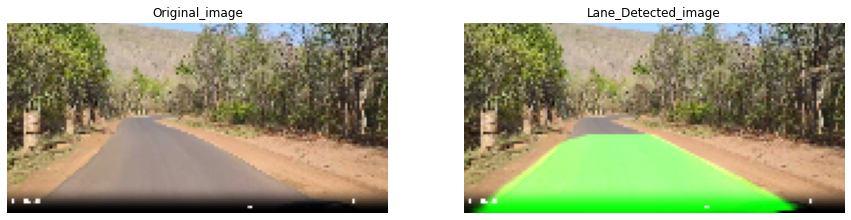

In [39]:
# Plot the images side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
axs[0].imshow(test_image)
axs[0].set_title("Original_image")

axs[1].imshow(result)
axs[1].set_title("Lane_Detected_image")

# Remove the axes
for ax in axs:
    ax.axis('off')

# Show the plot
plt.show()

In [5]:
# plt.imshow(test_image)
# plt.imshow(prediction)
# cv2.imwrite('op.jpg', result)